In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# -> Summer cleaning <-

In [3]:
summer_raw = pd.read_csv("../../Data/summer_imp.csv")
summer_raw

,Year,City,Sport,Discipline,Athlete Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold Medal
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold Medal
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31165,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31166,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31167,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31168,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


## 1. Analyze the data

In [32]:
summer_raw.describe()

,Year
count,31170.000000
mean,1970.483157
std,33.158454
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [33]:
summer_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          31170 non-null  int64 
 1   City          31170 non-null  object
 2   Sport         31170 non-null  object
 3   Discipline    31170 non-null  object
 4   Athlete Name  31170 non-null  object
 5   Country       31166 non-null  object
 6   Gender        31170 non-null  object
 7   Event         31170 non-null  object
 8   Medal         31170 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


Gold Medal is not ok we have Gold, Silver and Bronze. We need to change the column name

In [34]:
summer_raw.Medal.unique()

array(['Gold Medal', 'Silver', 'Bronze', 'Gold'], dtype=object)

In [35]:
summer_raw.Medal.value_counts()

Medal
Gold          10483
Bronze        10372
Silver        10311
Gold Medal        4
Name: count, dtype: int64

## Clean rows 
Change the value with replace method. (to_replace is a list of values to change, value is a list of new values)

In [36]:
summer_raw.Medal.replace(to_replace="Gold Medal", value="Gold", inplace=True)

C:\Users\Darius\AppData\Local\Temp\ipykernel_15492\2103726362.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  summer_raw.Medal.replace(to_replace="Gold Medal", value="Gold", inplace=True)


In [37]:
summer_raw.value_counts()

Year  City       Sport       Discipline           Athlete Name                   Country  Gender  Event                     Medal 
1912  Stockholm  Athletics   Athletics            LELONG, Charles Louis          FRA      Men     4X400M Relay              Silver    2
2008  Beijing    Rowing      Rowing               VOLPENHEIN, Bryan              USA      Men     Eight With Coxswain (8+)  Bronze    2
1980  Moscow     Boxing      Boxing               MUSTAFOV, Ismail               BUL      Men     - 48KG (Light-Flyweight)  Bronze    2
2012  London     Badminton   Badminton            ZHAO, Yunlei                   CHN      Women   Doubles                   Gold      2
1968  Mexico     Fencing     Fencing              KALMAR, Janos                  HUN      Men     Sabre Team                Bronze    2
                                                                                                                                     ..
1960  Rome       Gymnastics  Artistic G.          MEN

## Clean columns 'Athlete Name' it is not ok because , we have emty spaces. Need change to 'Athlete_Name'
columns =  a dict with the old name and the new name of the column

In [38]:
summer_raw.rename(columns={"Athlete Name": "Athlete_Name"}, inplace=True )

In [39]:
summer_raw

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31165,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31166,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31167,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31168,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


## 3. When we work with str data we need to clean the data (remove spaces, etc)
Values of Athlete_Name column have emty spaces. We need to remove them
Not working because we have emty spaces in the name


In [40]:
summer_raw.loc[summer_raw.Athlete_Name == "HAJOS, Alfred"]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal


SEE  we have emty spaces in the name. We need to remove them

In [41]:
summer_raw.iloc[0, 4]

' HAJOS, Alfred '

!!!! Is very important contains method is better than == because contains method is more flexible

In [42]:
summer_raw.loc[summer_raw.Athlete_Name.str.contains("Hajos, Alfred")]

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
6,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,1200M Freestyle,Gold


### We overwrite the column with the new values

In [43]:
summer_raw.Athlete_Name = summer_raw.Athlete_Name.str.rstrip()

Now Name of the Athlete  change to title case

In [44]:
summer_raw.Athlete_Name = summer_raw.Athlete_Name.str.title()

In [45]:
summer_raw.head()

,Year,City,Sport,Discipline,Athlete_Name,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"Hajos, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"Herschmann, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"Drivas, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"Malokinis, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"Chasapis, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


# -> Titanic cleaning <-
Inspect data

In [46]:
titanic_raw = pd.read_csv("titanic_imp.csv")

In [47]:
titanic_raw.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN


In [48]:
titanic_raw.tail()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN
893,0,3,male,36.0,0,0,$7.8958,S,NaN


OBJECT is when we have a column with different types of data ori we have +1 str
For a better performance we have 1 type of data in the column


For Survived column is better int because we have 0 and 1

In [49]:
titanic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


Not correct 4 values in the column 'Survived' we need to change to 0 and 1
We need change

In [50]:
titanic_raw.Survived.value_counts()

Survived
0      551
1      341
yes      1
no       1
Name: count, dtype: int64

In [51]:
titanic_raw.replace(to_replace=["yes", "no"], value=[0, 1], inplace=True)

Is 4 values bacaues we have for Survived column 0 and 1 to str and new values are int

In [52]:
titanic_raw.Survived.value_counts()

Survived
0    551
1    341
0      1
1      1
Name: count, dtype: int64

With astype method we can change the type of the column
When we use astype method after we need to overwrite the column

In [53]:
titanic_raw.Survived.astype("int")

0      0
1      1
2      1
3      1
4      0
      ..
889    1
890    0
891    0
892    0
893    0
Name: Survived, Length: 894, dtype: int32

In [54]:
titanic_raw.Survived = titanic_raw.Survived.astype("int")

In [55]:
titanic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    int32 
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int32(1), int64(3), object(5)
memory usage: 59.5+ KB


We can not change the type of the column Age because we have NA values

In [56]:
titanic_raw.Age = titanic_raw.Age.astype("float")

ValueError: could not convert string to float: 'Missing Data'

# Detection of Duplicates
## With duplicated method we can detect duplicates
keep=False means that we want to see all the duplicates
keep= first means first value is not duplicate
For example: [1, 1, 2, 2, 3, 3] result is [False, True, False, True, False, True] first value is not duplicate

keep= last means last value is not duplicate
For example: [1, 1, 2, 2, 3, 3] result is [True, False, True, False, True, False] last value is not duplicate


subset is a list of columns to check for duplicates

In [57]:
titanic_raw.duplicated(keep="first", subset=["Fare", "Emb"])

0      False
1      False
2      False
3      False
4      False
       ...  
889    False
890     True
891     True
892     True
893     True
Length: 894, dtype: bool

Duplicate method return a boolean series with True if the row is duplicated and False if the row is not duplicated.
With sum() method we can see the number of duplicates

In [58]:
titanic_raw.duplicated().sum()

97

We can add in [ ] method duplicated to see the duplicates
[ ] == set a filter

In [59]:
titanic_raw[titanic_raw.duplicated(keep=False)]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
4,0,3,male,35.0,0,0,$8.05,S,NaN
29,0,3,male,Missing Data,0,0,$7.8958,S,NaN
32,1,3,female,Missing Data,0,0,$7.75,Q,NaN
37,0,3,male,21.0,0,0,$8.05,S,NaN
45,0,3,male,Missing Data,0,0,$8.05,S,NaN
...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,$7.05,S,NaN
886,0,2,male,27.0,0,0,$13.0,S,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN


We can use drop_duplicates method to remove duplicates
Parameter keep="first" means that we want to keep the first duplicate
Parameter inplace=True means that we want to overwrite the dataframe
Parameter ignore_index=True means that we want to reset the index


In [60]:
titanic_raw.drop_duplicates(keep="first", inplace=True, ignore_index=True)
titanic_raw

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN
...,...,...,...,...,...,...,...,...,...
792,0,3,female,39.0,0,5,$29.125,Q,NaN
793,1,1,female,19.0,0,0,$30.0,S,B
794,0,3,female,NaN,1,2,$23.45,S,NaN
795,1,1,male,26.0,0,0,$30.0,C,C


# Detection of Outliers ( means that we have a value that is very different from the other values) 
Example: We have a column with the age of the people and we have a value of 200 years old

We can use describe method to see the statistics of the dataframe.Mean and  Max values are very important to detect outliers.
For example if we have a mean of 30 and a max value of 1000 we have a outlier

In [61]:
titanic = pd.read_csv("titanic.csv")

In [62]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can use boxplot to see the outliers

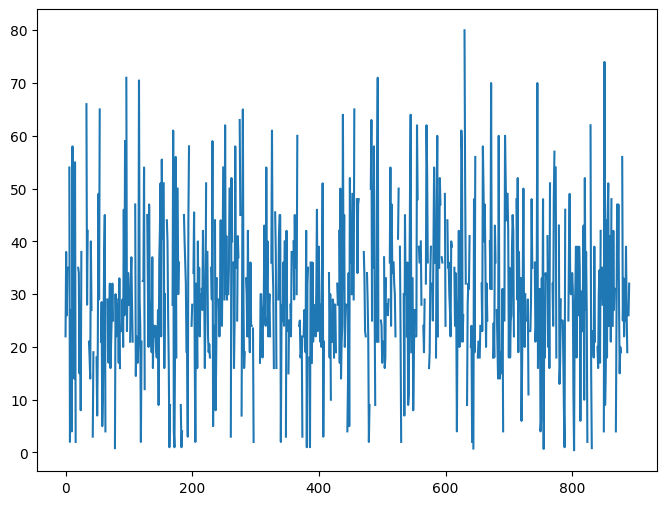

In [63]:
plt.figure(figsize=(8, 6))
titanic.age.plot()
plt.show()

# Set category tip of data
## Category help us for save memory and for better performance, but we need to have a column with a few unique values

In [64]:
titanic_raw

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN
...,...,...,...,...,...,...,...,...,...
792,0,3,female,39.0,0,5,$29.125,Q,NaN
793,1,1,female,19.0,0,0,$30.0,S,B
794,0,3,female,NaN,1,2,$23.45,S,NaN
795,1,1,male,26.0,0,0,$30.0,C,C


immer when we whant to select multi-columns we need to use double square brackets [[  ]]

In [76]:
titanic_raw[["Emb", "Deck"]].describe()

,Emb,Deck
count,795,202
unique,3,7
top,S,C
freq,572,59


Here we have 42,6 kb of memory

In [77]:
titanic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  797 non-null    int32   
 1   Class     797 non-null    int64   
 2   Gender    797 non-null    object  
 3   Age       710 non-null    object  
 4   SipSp     797 non-null    int64   
 5   ParCh     797 non-null    int64   
 6   Fare      797 non-null    object  
 7   Emb       795 non-null    category
 8   Deck      202 non-null    category
dtypes: category(2), int32(1), int64(3), object(3)
memory usage: 42.6+ KB


And now we overwrite the column with the new type of data

In [78]:
titanic_raw[['Emb', 'Deck']] = titanic_raw[['Emb', 'Deck']].astype("category")

OR

In [81]:
titanic_raw.Emb = titanic_raw.Emb.astype("category")

In [ ]:
titanic_raw.Deck = titanic_raw.Deck.astype("category")

In [85]:
titanic_raw.Gender = titanic_raw.Gender.astype("category")

In [86]:
titanic_raw

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN
...,...,...,...,...,...,...,...,...,...
792,0,3,female,39.0,0,5,$29.125,Q,NaN
793,1,1,female,19.0,0,0,$30.0,S,B
794,0,3,female,NaN,1,2,$23.45,S,NaN
795,1,1,male,26.0,0,0,$30.0,C,C


See now Dtype is category and memory is 38.5 kb. We save 4 kb of memory

In [87]:
titanic_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  797 non-null    int32   
 1   Class     797 non-null    int64   
 2   Gender    797 non-null    category
 3   Age       710 non-null    object  
 4   SipSp     797 non-null    int64   
 5   ParCh     797 non-null    int64   
 6   Fare      797 non-null    object  
 7   Emb       795 non-null    category
 8   Deck      202 non-null    category
dtypes: category(3), int32(1), int64(3), object(2)
memory usage: 37.3+ KB
